## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)

In [3]:
# 대분류 카테고리 합치기
total['대분류']=total['대분류'].replace(['가공식품','신선식품'],'식품')
total['대분류']=total['대분류'].replace(['의류','패션잡화'],'의류')
total['대분류']=total['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
total['대분류']=total['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
total['대분류'].unique()

array(['일상용품', '식품', '취미', '의류', '주거', '음식점', '의약품/의료기기', '기타'],
      dtype=object)

In [4]:
# 식품 일상용품 데이터 뽑기
total1=total[total['대분류'].isin(['식품','일상용품'])].reset_index(drop=True)

In [5]:
# 필요한 데이터 그룹화
df = total1.groupby(['고객번호','소분류코드','소분류명','구매일자','영수증번호']).agg(구매횟수=('영수증번호','nunique'))
df.reset_index(inplace=True)
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
0,1,A010101,위생세제,20140130,1307657,1
1,1,A010101,위생세제,20140228,1456379,1
2,1,A010101,위생세제,20140919,2751160,1
3,1,A010101,위생세제,20150327,3960475,1
4,1,A010101,위생세제,20151130,5602223,1
...,...,...,...,...,...,...
25587852,19383,D080204,아이섀도우,20151206,240284,1
25587853,19383,D080205,메이크업세트,20150815,237806,1
25587854,19383,D080302,립글로즈/틴트,20151206,240283,1
25587855,19383,D080302,립글로즈/틴트,20151206,240284,1


In [6]:
# 구매감소모델 돌린결과 감소고객 리스트 뽑기
pred = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster.csv',index_col=0)
pred

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485
...,...,...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4,2,0.392426
9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6,0,0.198347
9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6,4,0.123898
9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2,4,0.201445


In [7]:
# 온라인 유무고객 리스트 뽑기
predict = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/prediction1.csv',index_col=0)
predict=predict.reset_index()
predict=predict[predict['온라인유무'] == 1]
predict=predict[['고객번호','온라인유무']]
predict

,고객번호,온라인유무
5,7,1
12,14,1
40,42,1
72,74,1
92,94,1
...,...,...
18843,19312,1
18844,19313,1
18847,19316,1
18851,19320,1


In [8]:
# 대상 고객번호 뽑기
pred=pd.merge(pred,predict)
cus_id=pred['고객번호'].tolist()

In [9]:
pred

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수,온라인유무
0,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036,1
1,14,1,6,2,5,4,-0.485553,0.345021,1.6,2.4,0,0.048076,1
2,74,1,6,1,3,4,-2.270887,0.211328,1.0,-3.0,2,0.104003,1
3,123,1,6,2,2,2,-0.464078,0.764700,-0.2,2.2,1,0.224597,1
4,138,0,6,5,2,4,-0.944600,0.465882,2.2,-0.2,0,0.052857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,19268,0,3,2,1,1,-0.203757,0.275204,0.0,1.2,1,0.384215,1
3011,19289,0,2,1,4,1,-1.205401,0.810470,0.6,-0.6,1,0.101551,1
3012,19293,1,4,2,3,2,-0.187639,0.497405,0.2,-0.6,1,0.143452,1
3013,19304,0,4,5,4,5,-0.281636,0.438262,2.6,2.8,0,0.256976,1


In [10]:
len(cus_id)

3015

In [11]:
# 대상 고객번호 삽입
df=df[df['고객번호'].isin(cus_id)]
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
5962,7,A010101,위생세제,20151105,5439051,1
5963,7,A010103,뷰티상품,20141201,3221606,1
5964,7,A010201,우육,20141030,3004964,1
5965,7,A010201,우육,20150114,3515054,1
5966,7,A010201,우육,20150308,3838330,1
...,...,...,...,...,...,...
25535607,19333,D040109,쿠키,20150925,203167,1
25535608,19333,D040201,생수,20150424,202911,1
25535609,19333,D040201,생수,20151112,230105,1
25535610,19333,D040209,기타기능성음료,20150123,224369,1


In [12]:
# 2015년 데이터만 추출
df=df.query('구매일자 > 20141231 and 구매일자 <20151232')
df.reset_index(inplace=True,drop=True)
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
0,7,A010101,위생세제,20151105,5439051,1
1,7,A010201,우육,20150114,3515054,1
2,7,A010201,우육,20150308,3838330,1
3,7,A010201,우육,20150327,3956942,1
4,7,A010201,우육,20150427,4182295,1
...,...,...,...,...,...,...
2011004,19333,D040109,쿠키,20150925,203167,1
2011005,19333,D040201,생수,20150424,202911,1
2011006,19333,D040201,생수,20151112,230105,1
2011007,19333,D040209,기타기능성음료,20150123,224369,1


In [13]:
# 10월 이전 이후로 데이터 나누기
df_year_round = df[df['구매일자'] < 20151001]
df_year_end = df[df['구매일자'] > 20150930]

In [14]:
df_year_round

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
1,7,A010201,우육,20150114,3515054,1
2,7,A010201,우육,20150308,3838330,1
3,7,A010201,우육,20150327,3956942,1
4,7,A010201,우육,20150427,4182295,1
5,7,A010201,우육,20150507,4255519,1
...,...,...,...,...,...,...
2011003,19333,D040109,쿠키,20150523,202986,1
2011004,19333,D040109,쿠키,20150925,203167,1
2011005,19333,D040201,생수,20150424,202911,1
2011007,19333,D040209,기타기능성음료,20150123,224369,1


In [15]:
df_year_end

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
0,7,A010101,위생세제,20151105,5439051,1
7,7,A010201,우육,20151104,5433369,1
8,7,A010201,우육,20151227,5773439,1
9,7,A010201,우육,20151231,5796582,1
11,7,A010202,돈육,20151101,5412185,1
...,...,...,...,...,...,...
2010996,19333,D040106,하드캔디,20151105,192033,1
2010997,19333,D040106,하드캔디,20151107,225140,1
2010998,19333,D040106,하드캔디,20151113,225237,1
2011001,19333,D040108,일반스낵,20151115,225279,1


In [16]:
# 점수를 매기기위해 그룹화
uir_df=df_year_round.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
uir_df

,고객번호,소분류명,영수증번호
0,7,N/B골프의류,1
1,7,가공우유,1
2,7,가정용화장지,1
3,7,간식용소시지,2
4,7,감자,1
...,...,...,...
530666,19333,하드캔디,16
530667,19333,한식델리,2
530668,19333,햄,1
530669,19333,헬스건강,3


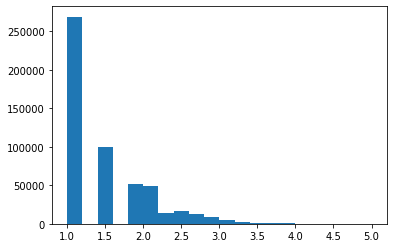

In [17]:
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
uir_df['점수'] = uir_df['영수증번호'].apply(lambda x: np.log10(x)+1)
uir_df['점수'] = ((uir_df['점수'] - uir_df['점수'].min()) / 
                    (uir_df['점수'].max() - uir_df['점수'].min()) * 4) + 1
uir_df['점수'].hist(bins=20, grid=False)

In [18]:
uir_df

,고객번호,소분류명,영수증번호,점수
0,7,N/B골프의류,1,1.000000
1,7,가공우유,1,1.000000
2,7,가정용화장지,1,1.000000
3,7,간식용소시지,2,1.507052
4,7,감자,1,1.000000
...,...,...,...,...
530666,19333,하드캔디,16,3.028206
530667,19333,한식델리,2,1.507052
530668,19333,햄,1,1.000000
530669,19333,헬스건강,3,1.803658


## Surprise 돌리기

In [19]:
# surprise 설치
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626467 sha256=f66eb8c8cfc798b666db64808dad902fce067c868d5f29587362b188a9083210
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [20]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [21]:
# 모델 RMSE 평가
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['고객번호', '소분류명', '점수']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()

predictions = model.test(test_data)
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

RMSE of test dataset in SVD model:
RMSE: 0.4881


0.488096056300664

In [22]:
# 2015년 10월 이전 데이터를 trainset (2015 1분기에서 2015 3분기까지)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['고객번호', '소분류명', '점수']], reader)
train_data = data.build_full_trainset()

# SVD 모델학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()


In [23]:
# 이전에 구매하지 않았던 상품
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

In [24]:
# 이전에 구매하지 않았던 상품 딕셔너리
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating
                
print(str(new_order_prediction_dict)[:300] + "...")

{7: {'L/C 아웃도어': 1.4577280724961015, 'L/C골프의류': 1.5638284874213992, 'PB바나나': 1.197112533414465, '가정보수용품': 1.039946864803332, '가지': 1.086034401331074, '감': 1, '감자스낵': 1.1766144572769963, '구두시즌': 1, '국산A/V': 1.1259886705326994, '국산고등어': 1.1923447547839559, '국산주방': 1.294340058473664, '군만두': 1.047547563...


In [25]:
# 이전에 구매했었던 상품
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

In [26]:
# 이전에 구매했었던 상품 딕셔너리 
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{7: {'N/B골프의류': 1.4708655537324917, '가공우유': 1.1662693732196543, '가정용화장지': 1.2639923008621905, '간식용소시지': 1.1313531615358465, '감자': 1.160782394750031, '건전지': 1.0777964278528125, '골프용품': 1.2985189656446103, '과일맛우유': 1.1108986870531739, '과채음료세트': 1.0790631554951942, '국산골드키위': 1.05496904531348, '그라스': 1....


In [27]:
# 두 딕셔너리를 하나로 통합
total_prediction_dict = {}


for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            

for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{7: {'L/C 아웃도어': 1.4577280724961015, 'L/C골프의류': 1.5638284874213992, 'PB바나나': 1.197112533414465, '가정보수용품': 1.039946864803332, '가지': 1.086034401331074, '감': 1, '감자스낵': 1.1766144572769963, '구두시즌': 1, '국산A/V': 1.1259886705326994, '국산고등어': 1.1923447547839559, '국산주방': 1.294340058473664, '군만두': 1.047547563...


In [28]:
# 10월 이후의 데이터 -> 테스트로 활용(2015년 4분기)
simulation_test_df = df_year_end.groupby(['고객번호','영수증번호'])['소분류명'].apply(set).reset_index()
simulation_test_df.columns = ['cus_id','receipt' ,'RealOrdered']
simulation_test_df

,cus_id,receipt,RealOrdered
0,7,420043,"{일반계란, 종량제봉투, 두부류, 기타냉장조리, 부침가루}"
1,7,5213358,{한식델리}
2,7,5213359,{디저트류}
3,7,5213360,{디저트류}
4,7,5213659,{에스닉푸드}
...,...,...,...
167974,19333,6936145,{차음료}
167975,19333,6936161,"{국내생수, 과일맛우유}"
167976,19333,6936185,"{체중조절용시리얼, 수입캔디}"
167977,19333,6936551,"{커피/초코우유, 차음료}"


In [29]:
#시뮬레이션 결과 추가
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()                            

,cus_id,receipt,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,7,420043,"{일반계란, 종량제봉투, 두부류, 기타냉장조리, 부침가루}","[유기농채소, 국산맥주, 서양델리, 음료, 온라인 파이, 원두커피, 오골계, 일반화...","[재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리, 농산가공,...","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리..."
1,7,5213358,{한식델리},"[유기농채소, 국산맥주, 서양델리, 음료, 온라인 파이, 원두커피, 오골계, 일반화...","[재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리, 농산가공,...","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리..."
2,7,5213359,{디저트류},"[유기농채소, 국산맥주, 서양델리, 음료, 온라인 파이, 원두커피, 오골계, 일반화...","[재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리, 농산가공,...","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리..."
3,7,5213360,{디저트류},"[유기농채소, 국산맥주, 서양델리, 음료, 온라인 파이, 원두커피, 오골계, 일반화...","[재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리, 농산가공,...","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리..."
4,7,5213659,{에스닉푸드},"[유기농채소, 국산맥주, 서양델리, 음료, 온라인 파이, 원두커피, 오골계, 일반화...","[재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리, 농산가공,...","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품, 일식델리, 채소, 한식델리..."


In [30]:
# 구매 예측의 상위 k개의 recall(재현율)
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 고객
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율 계산
    recall = true_positive / len(predicted)
    return recall

In [68]:
# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가(상위 점수 5개 추천)
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)

simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                               apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)


In [69]:
# 재현도 평균(전체 평균 재현도 6%)
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.06733341667708463
0.0023360062865000982
0.05926812280106442


In [73]:
# 재현도 평균(전체 평균 재현도 6.7%)
print(simulation_test_df['top_k_recall(Reorder)'].mean())

0.06733341667708463


In [70]:
# 추천 시뮬레이션 결과
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Total)'].notnull()]
result_df['PredictedOrder(Total)'] = result_df['PredictedOrder(Total)'].\
                                        apply(lambda x: x[:k])
result_df = result_df[['cus_id','receipt' ,'RealOrdered', 'PredictedOrder(Total)', 'top_k_recall(Total)']]

result_df=result_df.rename({"cus_id":"고객번호",'receipt':'영수증번호',"RealOrdered":"실제주문","PredictedOrder(Total)":"추천주문5개","top_k_recall(Total)":"재현도"},axis=1)

result_df.sample(20)

,고객번호,영수증번호,실제주문,추천주문5개,재현도
12508,2081,7857977,"{기타선식, 찰현미류, 스틱원두커피, 냉장규격연어, 호주산와규, 딸기, 고추, 호주...","[재사용봉투, 일반흰우유, 기능성우유, 부침두부, 국산콩나물]",0.0
56078,6435,5345249,{기초 화장품},"[재사용봉투, 일반스낵, 어묵, 다이소, 일반흰우유]",0.0
116802,12118,5808819,{사과},"[일반우유, 일반스낵, 종량제봉투, 두부류, 감자스낵]",0.0
46081,5550,5344458,{머렐},"[재사용봉투, 다이소, 일반흰우유, 일반스낵, 일반화장품]",0.0
22502,3171,50495,{식탁김},"[일반흰우유, 다이소, 유기농채소, NB돼지고기, 일반스낵]",0.0
112896,11693,829954,"{바나나, 기타전통과자, 배추}","[두부류, 일반우유, 일반계란, 종량제봉투, 일반스낵]",0.0
159767,17575,5750150,{아디다스의류},"[기초 화장품, 유제품, 청과, 원두커피, 채소]",0.0
53745,6258,5402820,{일식델리},"[재사용봉투, 유제품, 다이소, 청과, 음료]",0.0
139440,14753,10081976,{병소주},"[일반흰우유, 국산맥주, 일반스낵, 다이소, 재사용봉투]",0.0
146539,15682,9104357,"{식수용차, 쿠키, 밀폐용기, 바디스킨케어, 스틱과자, 페인트, 고농축섬유유연제, ...","[일반흰우유, 일반스낵, 다이소, 감자스낵, 재사용봉투]",0.0


In [71]:
result_df['재현도'].mean()

0.05926812280106442

In [35]:
# 8분기 전체 영수증 갯수
len(result_df)

167979

In [72]:
result_df[result_df['재현도']>=0.2]

,고객번호,영수증번호,실제주문,추천주문5개,재현도
5,7,5223542,{유제품},"[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품]",0.2
11,7,5327683,"{채소, 청과}","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품]",0.2
25,7,5482762,{청과},"[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품]",0.2
33,7,5546274,{유제품},"[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품]",0.2
44,7,5663030,"{생선, 청과}","[유기농채소, 재사용봉투, 유제품, 청과, 기초 화장품]",0.2
...,...,...,...,...,...
167907,19333,192033,"{다이어트보조식품, 하드캔디}","[기초 화장품, 원두커피, 전문베이커리, 다이어트보조식품, 색조 화장품]",0.2
167909,19333,193404,{다이어트보조식품},"[기초 화장품, 원두커피, 전문베이커리, 다이어트보조식품, 색조 화장품]",0.2
167910,19333,203563,{다이어트보조식품},"[기초 화장품, 원두커피, 전문베이커리, 다이어트보조식품, 색조 화장품]",0.2
167911,19333,203653,"{다이어트보조식품, 건강보조식품세트}","[기초 화장품, 원두커피, 전문베이커리, 다이어트보조식품, 색조 화장품]",0.2


In [65]:
# 추천프로그램 도입후 증가할 물품갯수
# 한 영수증당 5개의 상품을 추천해서 재현도가 0.2일경우 물품 1개가 추가된다. 위에서 구한 전체 평균재현도는 0.06 이므로 전체 구매물품 증가수는 전체영수증갯수 x 5 x 평균재현도 
len(result_df)*0.06*5

67191.6

## 솔루션 기대결과 예상



### 2015년 3분기 식품 일상용품 대상 분석

In [43]:
# 2015년 3분기의 온라인 아이디가 있는 식품,일상용품 구매한 구매감소고객 데이터 뽑기
total3=total1[total1['고객번호'].isin(cus_id)]
quarter_2015_3=total3[total3['분기']==7]
quarter_2015_3.reset_index(inplace=True,drop=True)
quarter_2015_3

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,4964995,6677,20,20150821,12,12820,1,4,1.0,2015,저가,7,A
1,1,101,A010101,일용잡화,위생세제,일상용품,4813699,6677,20,20150728,12,12300,1,4,1.0,2015,저가,7,A
2,1,101,A010101,일용잡화,위생세제,일상용품,5128115,6677,20,20150917,15,6300,1,4,1.0,2015,저가,7,A
3,1,101,A010101,일용잡화,위생세제,일상용품,4665129,6677,20,20150706,16,6300,1,4,1.0,2015,저가,7,A
4,1,101,A010101,일용잡화,위생세제,일상용품,5074719,6677,20,20150908,12,14460,1,4,1.0,2015,저가,7,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496501,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773311,8477,44,20150719,13,1000,1,3,12.0,2015,저가,7,C
496502,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774134,8477,44,20150904,9,1500,1,3,12.0,2015,저가,7,C
496503,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773081,8477,44,20150706,10,2000,1,3,12.0,2015,저가,7,C
496504,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774555,8477,44,20150928,19,2000,1,3,12.0,2015,저가,7,C


In [44]:
# 2015 3분기 식품,일상용품구매 고객수
quarter_2015_3['고객번호'].nunique()

3014

In [45]:
# 총구매금액 구하기 
quarter_2015_3['구매금액'].sum()

5742457015

In [46]:
# 물품당 평균단가
quarter_2015_3['구매금액'].sum()/len(quarter_2015_3)

11565.735388897616

In [47]:
# 영수증 갯수
len(quarter_2015_3['영수증번호'].unique())

170837

In [48]:
# 인당 영수증 갯수
kkk=len(quarter_2015_3['영수증번호'].unique())/len(cus_id)
kkk

56.66235489220564

In [49]:
# 영수증당 평균 물품 갯수
len(quarter_2015_3)/len(quarter_2015_3['영수증번호'].unique())

2.9063142059389944

In [50]:
# 증가할 물품갯수 
len(quarter_2015_3['영수증번호'].unique()) * 0.06 * 5

51251.1

In [51]:
# 추천시스템 적용전 물품갯수
len(quarter_2015_3)

496506

In [53]:
# 추천시스템 적용후 물품갯수
len(quarter_2015_3) + len(quarter_2015_3['영수증번호'].unique()) * 0.06 * 5

547757.1

In [55]:
# 추천시스템 적용후 총구매금액 (물품당 평균단가 x 추천시스템 적용후 물품갯수)
(quarter_2015_3['구매금액'].sum()/len(quarter_2015_3)) * (len(quarter_2015_3) + len(quarter_2015_3['영수증번호'].unique()) * 0.06 * 5)

6335213675.98993

In [ ]:
# 총구매금액 증가치 
6335213675 - 5742457015

118551332

In [56]:
# 총구매금액 성장률 10%
6335213675/5742457015

1.1032235258272978

#### 참고 공식
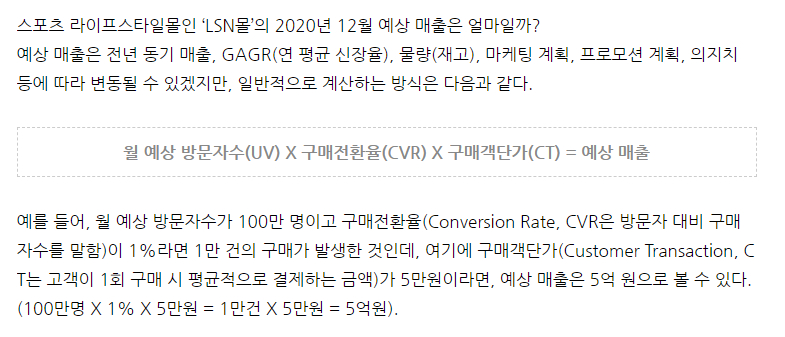

### 2015년 3분기 전체 카테고리 대상 분석

In [ ]:
# 2015년 3분기의 온라인 아이디가 있는 구매감소고객 데이터 뽑기
total3=total[total['고객번호'].isin(cus_id)]
quarter_2015_3=total3[total3['분기']==7]
quarter_2015_3.reset_index(inplace=True,drop=True)
quarter_2015_3

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,4964995,6677,20,20150821,12,12820,1,4,1.0,2015,저가,7,A
1,1,101,A010101,일용잡화,위생세제,일상용품,4813699,6677,20,20150728,12,12300,1,4,1.0,2015,저가,7,A
2,1,101,A010101,일용잡화,위생세제,일상용품,5128115,6677,20,20150917,15,6300,1,4,1.0,2015,저가,7,A
3,1,101,A010101,일용잡화,위생세제,일상용품,4665129,6677,20,20150706,16,6300,1,4,1.0,2015,저가,7,A
4,1,101,A010101,일용잡화,위생세제,일상용품,5074719,6677,20,20150908,12,14460,1,4,1.0,2015,저가,7,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553110,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773311,8477,44,20150719,13,1000,1,3,12.0,2015,저가,7,C
553111,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774134,8477,44,20150904,9,1500,1,3,12.0,2015,저가,7,C
553112,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773081,8477,44,20150706,10,2000,1,3,12.0,2015,저가,7,C
553113,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774555,8477,44,20150928,19,2000,1,3,12.0,2015,저가,7,C


In [ ]:
#카테고리 종류
quarter_2015_3['대분류'].unique()

array(['일상용품', '식품', '취미', '의류', '주거', '기타', '음식점', '의약품/의료기기'],
      dtype=object)

In [ ]:
# 2015 3분기 고객수
quarter_2015_3['고객번호'].nunique()

3015

In [ ]:
# 총구매금액 구하기 
quarter_2015_3['구매금액'].sum()

9567049695

In [ ]:
# 물품당 평균단가
quarter_2015_3['구매금액'].sum()/len(quarter_2015_3)

17296.67373873426

In [ ]:
# 영수증 갯수
len(quarter_2015_3['영수증번호'].unique())

202508

In [ ]:
# 인당 영수증 갯수
kkk=len(quarter_2015_3['영수증번호'].unique())/len(cus_id)
kkk

67.16683250414594

In [ ]:
# 영수증당 평균 물품 갯수
len(quarter_2015_3)/len(quarter_2015_3['영수증번호'].unique())

2.7313241945997193

In [ ]:
# 증가할 물품갯수 
len(quarter_2015_3['영수증번호'].unique()) * 0.06

12150.48

In [ ]:
# 추천시스템 적용전 물품갯수
len(quarter_2015_3)

553115

In [ ]:
# 추천시스템 적용후 물품갯수
len(quarter_2015_3) + len(quarter_2015_3['영수증번호'].unique()) * 0.06

565265.48

In [ ]:
# 추천시스템 적용후 총구매금액 (물품당 평균단가 x 추천시스템 적용후 물품갯수)
(quarter_2015_3['구매금액'].sum()/len(quarter_2015_3)) * (len(quarter_2015_3) + len(quarter_2015_3['영수증번호'].unique()) * 0.06)

9777212583.329014

In [ ]:
# 총구매금액 증가치 
9777212583 - 9567049695

210162888

In [ ]:
# 총구매금액 성장률 2.1%
9777212583/9567049695

1.0219673666072662